In [1]:
data <- read.csv("new_chr14_static_classified.csv")
head(data,10)
# tail(data,10)
# head(read.csv("new_chr19_static_classified.csv"))

X,binID,start,cata,aRead,bRead,aNorm,bNorm
120050,chr14_3004800,3004700,3,51,74,91.071429,93.670886
53731,chr14_3004800,3004700,2,5,5,8.928571,6.329114
120051,chr14_3006400,3006300,3,19,38,76.000000,77.551020
53732,chr14_3006400,3006300,2,6,11,24.000000,22.448980
120052,chr14_3006500,3006400,3,53,73,74.647887,83.908046
53733,chr14_3006500,3006400,2,18,14,25.352113,16.091954
120053,chr14_3015500,3015400,3,24,21,100.000000,100.000000
120054,chr14_3015600,3015500,3,12,10,100.000000,100.000000
120055,chr14_3015800,3015700,3,14,18,100.000000,100.000000
120056,chr14_3016100,3016000,3,20,29,86.956522,78.378378


In [2]:
high_sub <- data[data$cata == 3, c("binID", "start", "bRead")]
names(high_sub) <- c("binID", "start", "high")
# head(high_sub)
medium_sub <- data[data$cata == 2, c("binID", "start", "bRead")]
names(medium_sub) <- c("binID", "start", "medium")
# head(medium_sub)
low_sub <- data[data$cata == 1, c("binID", "start", "bRead")]
names(low_sub) <- c("binID", "start", "low")
# head(low_sub)

# merge
clusterdf <- merge(high_sub, medium_sub, all = TRUE)
clusterdf <- merge(clusterdf, low_sub, all = TRUE)
clusterdf <- clusterdf[order(as.numeric(clusterdf$start)),]
clusterdf[is.na(clusterdf)] <- 0
head(clusterdf,10)

,binID,start,high,medium,low
26341,chr14_3004800,3004700,74,5,0
26357,chr14_3006400,3006300,38,11,0
26359,chr14_3006500,3006400,73,14,0
26438,chr14_3015500,3015400,21,0,0
26439,chr14_3015600,3015500,10,0,0
26440,chr14_3015800,3015700,18,0,0
26443,chr14_3016100,3016000,29,8,0
26481,chr14_3020300,3020200,22,0,0
26486,chr14_3021000,3020900,298,35,0
26495,chr14_3021700,3021600,17,0,0


In [3]:
paste("Total number of Bins:", nrow(clusterdf))

[1] "Total number of Bins: 71057"

In [4]:
# write.csv(clusterdf, "A_clusterdf_count.csv")

In [5]:
dist_tolerance <- 100
# meth_tolerance <- 40 
# cor_2_cutoff <- 0.9
alpha <- 0.05

In [6]:
pre.row <- clusterdf[1,]

dist.fun <- function(row) {
    dist <- as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"]))
    pre.row <<- row
    return(c(row["binID"], row["start"], row["high"], row["medium"], row["low"], dist = dist)) 
}

dist.result <- t(apply(clusterdf, 1, dist.fun))
dist.result <- as.data.frame(dist.result)
head(dist.result, 30)

,binID,start,high,medium,low,dist
26341,chr14_3004800,3004700,74,5,0,0
26357,chr14_3006400,3006300,38,11,0,1600
26359,chr14_3006500,3006400,73,14,0,100
26438,chr14_3015500,3015400,21,0,0,9000
26439,chr14_3015600,3015500,10,0,0,100
26440,chr14_3015800,3015700,18,0,0,200
26443,chr14_3016100,3016000,29,8,0,300
26481,chr14_3020300,3020200,22,0,0,4200
26486,chr14_3021000,3020900,298,35,0,700
26495,chr14_3021700,3021600,17,0,0,700


In [7]:
dist.result <- dist.result[as.numeric(as.character(dist.result$dist)) <= dist_tolerance, ]
head(dist.result)

dist.result <- dist.result[-1,]
head(dist.result)
nrow(dist.result)

,binID,start,high,medium,low,dist
26341,chr14_3004800,3004700,74,5,0,0
26359,chr14_3006500,3006400,73,14,0,100
26439,chr14_3015600,3015500,10,0,0,100
26709,chr14_3048300,3048200,40,50,65,100
26729,chr14_3050500,3050400,0,0,37,100
26732,chr14_3050800,3050700,11,8,10,100


,binID,start,high,medium,low,dist
26359,chr14_3006500,3006400,73,14,0,100
26439,chr14_3015600,3015500,10,0,0,100
26709,chr14_3048300,3048200,40,50,65,100
26729,chr14_3050500,3050400,0,0,37,100
26732,chr14_3050800,3050700,11,8,10,100
26733,chr14_3050900,3050800,53,19,7,100


[1] 9336

In [8]:
start.pos <- dist.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]   3006300   3006400   3015400   3015500   3048100   3048200   3050300
    [8]   3050400   3050600   3050700   3050800   3051000   3051100   3051200
   [15]   3100200   3100300   3115600   3115700   3116000   3116100   3116900
   [22]   3117000   3120200   3120300   3167100   3167200   3167300   3167400
   [29]   3177100   3177200   3178900   3179000   3179400   3179500   3207400
   [36]   3207500   3208700   3208800   3209200   3209300   3209800   3209900
   [43]   3210000   3237200   3237300   3270500   3270600   3271900   3272000
   [50]   3272100   3275600   3275700   3277400   3277500   3287700   3287800
   [57]   3287900   3290900   3291000   3293500   3293600   3325500   3325600
   [64]   3333200   3333300   3333700   3333800   3815200   3815300   3912100
   [71]   3912200   3929300   3929400   4019600   4019700   4019900   4020000
   [78]   4057400   4057500   4064700   4064800   4070200   4070300   4072200
   [85]   4072300   4088000   4088100   4097600   4097700   4097800   4097900
   [92]   4098000   4109400   4109500   4111000   4111100   4111600   4111700
   [99]   4111800   4112100   4112200   4143100   4143200   4153500   4153600
  [106]   4153700   4183700   4183800   4210200   4210300   4210400   4221100
  [113]   4221200   4228900   4229000   4234500   4234600   4239900   4240000
  [120]   4240100   4274100   4274200   4320100   4320200   4326700   4326800
  [127]   4334200   4334300   4335800   4335900   4336000   4336100   4336200
  [134]   4336300   4360000   4360100   4371400   4371500   4372200   4372300
  [141]   4407500   4407600   4416200   4416300   4416700   4416800   4416900
  [148]   4432300   4432400   4432500   4467100   4467200   4473700   4473800
  [155]   4526000   4526100   4535000   4535100   4570900   4571000   4572100
  [162]   4572200   4572300   4593700   4593800   4595000   4595100   4595200
  [169]   4595300   4596100   4596200   4613400   4613500   4613600   4650300
  [176]   4650400   4650900   4651000   4651100   4651200   4681000   4681100
  [183]   4694400   4694500   4727100   4727200   4727300   4727400   4727500
  [190]   4727600   4745500   4745600   4801100   4801200   4855000   4855100
  [197]   4882400   4882500   4917300   4917400   4935500   4935600   4939000
  [204]   4939100   4940000   4940100   4940200   4940300   4944100   4944200
  [211]   4944300   4958400   4958500   5071600   5071700   5071800   5071900
  [218]   5081500   5081600   5122700   5122800   5275900   5276000   5838400
  [225]   5838500   5838600   5839300   5839400   5839500   5842700   5842800
  [232]   5851900   5852000   5852300   5852400   5853600   5853700   5879100
  [239]   5879200   5912100   5912200   5958500   5958600   5960200   5960300
  [246]   5960400   5960500   5960900   5961000   5972500   5972600   5988200
  [253]   5988300   6036700   6036800   6038500   6038600   6038700   6067700
  [260]   6067800   6106900   6107000   6107100   6107300   6107400   6107500
  [267]   6127100   6127200   6146400   6146500   6177600   6177700   6180900
  [274]   6181000   6181100   6193000   6193100   6205400   6205500   6224400
  [281]   6224500   6225000   6225100   6228700   6228800   6252400   6252500
  [288]   6282800   6282900   6283000   6283100   6286700   6286800   6320100
  [295]   6320200   6322700   6322800   6323700   6323800   6426200   6426300
  [302]   6426500   6426600   6482200   6482300   6493600   6493700   6499400
  [309]   6499500   6508700   6508800   6508900   6509000   6509100   6542900
  [316]   6543000   6543100   6543200   6556600   6556700   6556800   6556900
  [323]   6557000   6557100   6559500   6559600   6603700   6603800   6604200
  [330]   6604300   6604400   6604500   6630100   6630200   6644600   6644700
  [337]   6658300   6658400   6658700   6658800   6662400   6662500   6675900
  [344]   6676000   6676500   6676600   6686800   6686900   6734300   6734400
  [351]   6739400   6739500   6755800   6755900   6756100   6756200   6764800
  [358]   6764900   679220

In [9]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
dist.result <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
26357,chr14_3006400,3006300,38,11,0
26359,chr14_3006500,3006400,73,14,0
26438,chr14_3015500,3015400,21,0,0
26439,chr14_3015600,3015500,10,0,0
26706,chr14_3048200,3048100,76,54,31
26709,chr14_3048300,3048200,40,50,65
26728,chr14_3050400,3050300,0,0,87
26729,chr14_3050500,3050400,0,0,37
26731,chr14_3050700,3050600,22,3,0
26732,chr14_3050800,3050700,11,8,10


In [10]:
pre.row <- dist.result[1,]

test.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = "0"))
    } else {
        test.matrix <- cbind(c(as.numeric(as.character(pre.row["high"])),
                               as.numeric(as.character(pre.row["medium"])),
                               as.numeric(as.character(pre.row["low"]))),
                             c(as.numeric(as.character(row["high"])), 
                               as.numeric(as.character(row["medium"])),
                               as.numeric(as.character(row["low"]))))
        test.matrix <- test.matrix[rowSums(test.matrix) > 0, ]
        value <- suppressWarnings(chisq.test(test.matrix)$p.value)
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = as.character(value)))
    }
}

test.result <- apply(dist.result[-1,], MARGIN = 1, FUN = test.fun)
test.result <- t(test.result)
test.result <- as.data.frame(test.result)
head(test.result)

,binID,start,p.value
26359,chr14_3006500,3006400,0.491265316114685
26438,chr14_3015500,3015400,0
26439,chr14_3015600,3015500,0.048193488293191
26706,chr14_3048200,3048100,0
26709,chr14_3048300,3048200,8.88456950127431e-06
26728,chr14_3050400,3050300,0


In [11]:
good.result <- test.result[as.numeric(as.character(test.result$p.value)) > alpha,]
head(good.result)

,binID,start,p.value
26359,chr14_3006500,3006400,0.491265316114685
26740,chr14_3051200,3051100,0.86025339518005
27178,chr14_3100400,3100300,0.0813294207554774
27274,chr14_3115800,3115700,0.349501135297387
27281,chr14_3116200,3116100,0.753152364765915
27292,chr14_3117100,3117000,0.197854172476093


In [12]:
start.pos <- good.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]   3006300   3006400   3051000   3051100   3100200   3100300   3115600
   [8]   3115700   3116000   3116100   3116900   3117000   3177100   3177200
  [15]   3209200   3209300   3209900   3210000   3277400   3277500   3293500
  [22]   3293600   3325500   3325600   3333200   3333300   3815200   3815300
  [29]   3912100   3912200   3929300   3929400   4057400   4057500   4064700
  [36]   4064800   4088000   4088100   4097600   4097700   4097800   4097900
  [43]   4112100   4112200   4143100   4143200   4153500   4153600   4210300
  [50]   4210400   4221100   4221200   4234500   4234600   4239900   4240000
  [57]   4240100   4326700   4326800   4334200   4334300   4336100   4336200
  [64]   4336300   4432400   4432500   4467100   4467200   4526000   4526100
  [71]   4535000   4535100   4595000   4595100   4613500   4613600   4651000
  [78]   4651100   4651200   4681000   4681100   4727300   4727400   4727500
  [85]   4727600   4745500   4745600   4801100   4801200   4855000   4855100
  [92]   4917300   4917400   4940100   4940200   4944100   4944200   4944300
  [99]   5071600   5071700   5071800   5071900   5838500   5838600   5851900
 [106]   5852000   5853600   5853700   5879100   5879200   5958500   5958600
 [113]   5960200   5960300   5960400   5960900   5961000   6067700   6067800
 [120]   6106900   6107000   6107100   6146400   6146500   6180900   6181000
 [127]   6205400   6205500   6252400   6252500   6282800   6282900   6283000
 [134]   6283100   6322700   6322800   6323700   6323800   6426200   6426300
 [141]   6426500   6426600   6493600   6493700   6509000   6509100   6543100
 [148]   6543200   6556600   6556700   6556800   6556900   6557000   6557100
 [155]   6559500   6559600   6604300   6604400   6604500   6644600   6644700
 [162]   6662400   6662500   6675900   6676000   6676500   6676600   6734300
 [169]   6734400   6755800   6755900   6792200   6792300   6826800   6826900
 [176]   6827800   6827900   6848400   6848500   6848600   6888400   6888500
 [183]   6898300   6898400   6936000   6936100   6949000   6949100   6949300
 [190]   6949400   6983000   6983100   7026500   7026600   7026700   7243200
 [197]   7243300   7245000   7245100   7313900   7314000   7314400   7314500
 [204]   7314700   7314800   7343700   7343800   7381500   7381600   7390600
 [211]   7390700   7394900   7395000   7396200   7396300   7399000   7399100
 [218]   7400600   7400700   7405200   7405300   7425400   7425500   7425600
 [225]   7487400   7487500   7515100   7515200   7515300   7556400   7556500
 [232]   7567700   7567800   7589300   7589400   7604200   7604300   7656900
 [239]   7657000   7657100   7657200   7702100   7702200   7713900   7714000
 [246]   7714200   7714300   7751400   7751500   7771100   7771200   7880500
 [253]   7880600   7905500   7905600   7907300   7907400   7912900   7913000
 [260]   7915500   7915600   7980100   7980200   8032300   8032400   8039700
 [267]   8039800   8043000   8043100   8046100   8046200   8050000   8050100
 [274]   8066400   8066500   8144000   8144100   8157700   8157800   8215100
 [281]   8215200   8222200   8222300   8239200   8239300   8310600   8310700
 [288]   8360800   8360900   8363200   8363300   8410100   8410200   8437700
 [295]   8437800   8441200   8441300   8499500   8499600   8525300   8525400
 [302]   8586200   8586300   8586400   8622800   8622900   8656300   8656400
 [309]   8671300   8671400   8742600   8742700   8889600   8889700   8968100
 [316]   8968200   9205500   9205600   9267600   9267700   9392000   9392100
 [323]   9419500   9419600   9419700   9421100   9421200   9422400   9422500
 [330]   9501400   9501500   9609000   9609100   9740700   9740800   9860300
 [337]   9860400   9886400   9886500  10112200  10112300  10112400  10145800
 [344]  10145900  10190600  10190700  10476500  10476600  10558300  10558400
 [351]  10684500  10684600  10758600  10758700  10822000  10822100  10823500
 [358]  10823600  10865600  10865700  10955100  10955200  10966400  10966500

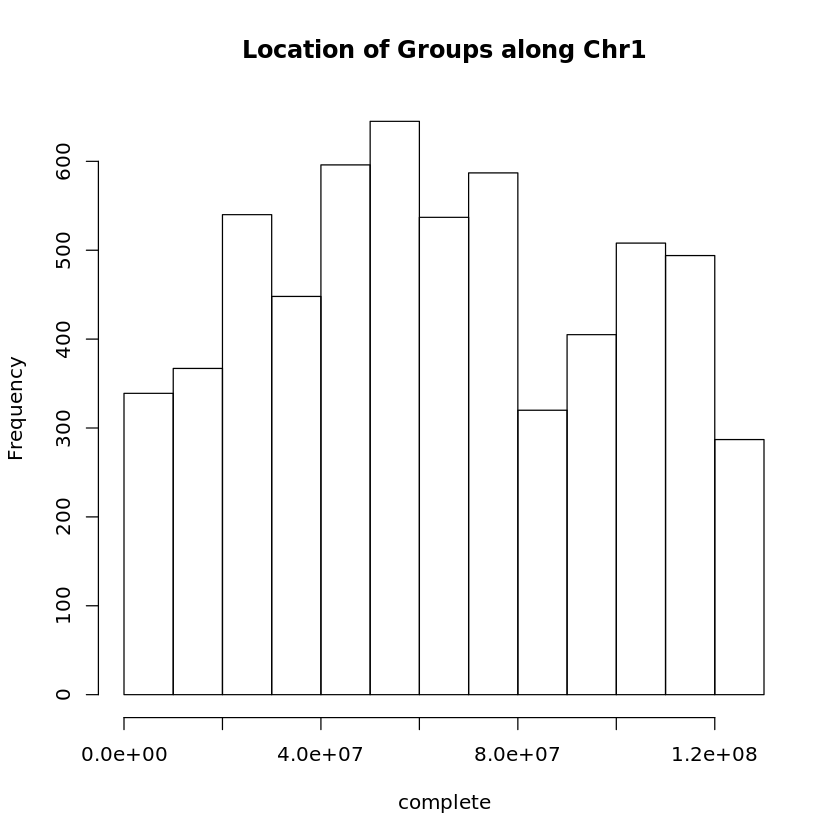

In [13]:
hist(complete, main = "Location of Groups along Chr1")

In [14]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
grouping <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
26357,chr14_3006400,3006300,38,11,0
26359,chr14_3006500,3006400,73,14,0
26737,chr14_3051100,3051000,39,15,2
26740,chr14_3051200,3051100,47,22,2
27176,chr14_3100300,3100200,125,11,4
27178,chr14_3100400,3100300,43,0,0
27272,chr14_3115700,3115600,48,3,0
27274,chr14_3115800,3115700,38,6,0
27280,chr14_3116100,3116000,44,0,0
27281,chr14_3116200,3116100,47,0,0


In [15]:
paste("Total number of bins grouped:", nrow(grouping))

[1] "Total number of bins grouped: 6073"

In [16]:
library(ggplot2)

In [17]:
pre.row <- grouping[1,]

part <- data.frame()
part <- rbind(part, pre.row)

counter = 1
sep.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        part <<- rbind(part, data.frame(binID = c(paste("gap", counter)), 
                                        start = c(0), high = c(100), medium = c(100), low = c(100)))
        counter <<- counter + 1
    }
    part <<- rbind(part, row)
    pre.row <<- row
}

invisible(apply(grouping[-1,], 1, sep.fun))

In [18]:
part[20:60,]

,binID,start,high,medium,low
20,chr14_3177300,3177200,269,3,4
110,gap 7,0,100,100,100
22,chr14_3209300,3209200,0,0,70
23,chr14_3209400,3209300,0,4,74
112,gap 8,0,100,100,100
25,chr14_3210000,3209900,21,0,0
26,chr14_3210100,3210000,27,0,3
113,gap 9,0,100,100,100
28,chr14_3277500,3277400,62,17,8
29,chr14_3277600,3277500,38,7,0


In [19]:
head(part)
tail(part)

,binID,start,high,medium,low
26357,chr14_3006400,3006300,38,11,0
2,chr14_3006500,3006400,73,14,0
1,gap 1,0,100,100,100
4,chr14_3051100,3051000,39,15,2
5,chr14_3051200,3051100,47,22,2
11,gap 2,0,100,100,100


,binID,start,high,medium,low
13385,gap 2865,0,100,100,100
8935,chr14_124593200,124593100,235,18,18
8936,chr14_124593300,124593200,136,13,10
13386,gap 2866,0,100,100,100
8938,chr14_124731800,124731700,72,19,0
8939,chr14_124731900,124731800,61,8,0


In [20]:
write.csv(part, "chr14_B_group.csv")

[1] "Total Number of groups: 2867"

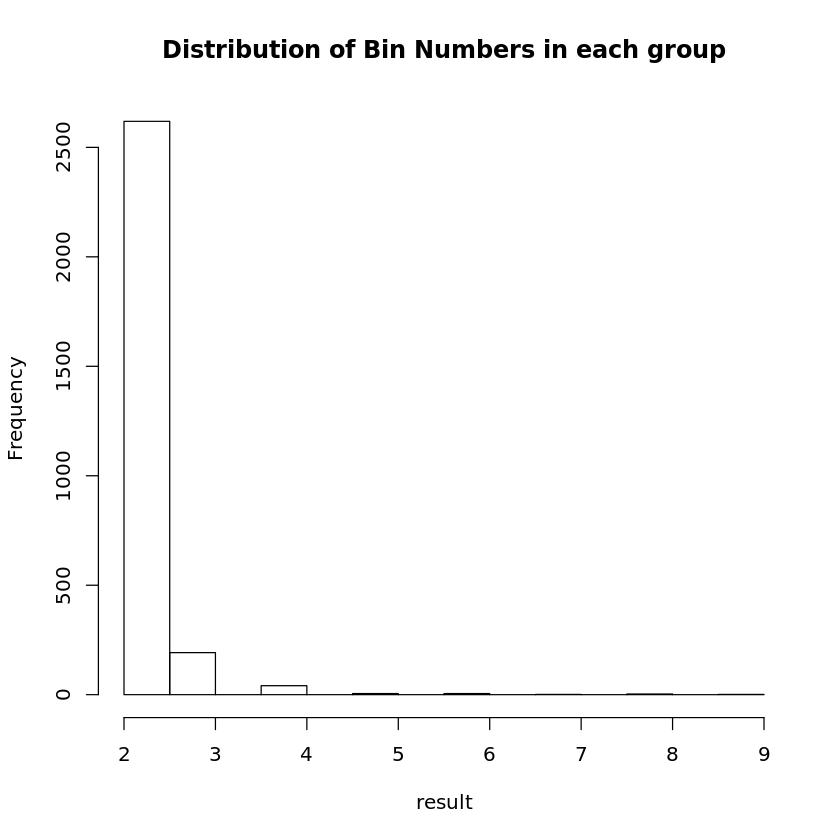

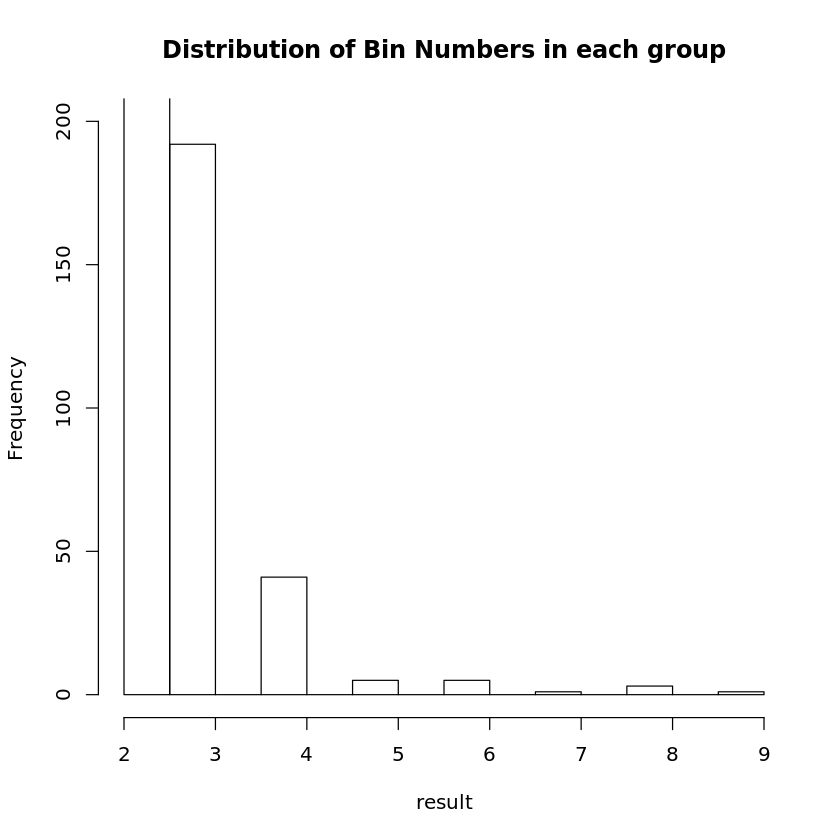

In [21]:
count = 0
result = c()
for (row in 1:nrow(part)) {
    if (substr(as.character(part[row, "binID"]), 1, 3) != "gap") {
        count = count + 1
    } else {
        result = c(result, count)
        count = 0
    }
}

result = c(result, count)

paste("Total Number of groups:", length(result))
hist(result, main = "Distribution of Bin Numbers in each group")
hist(result, ylim = c(0, 200), main = "Distribution of Bin Numbers in each group")

In [22]:
# plotdf <- data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,3])), cata = c(3))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,4])), cata = c(4)))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,5])), cata = c(5)))


# plotdf

In [23]:
# for (i in 2:nrow(part)){
#     if (substr(as.character(part[i,1]),1,3) == "gap"){
#         plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(100), cata = c(1)))
#     } else {
#         for (j in 3:5){
#             plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(as.numeric(as.character(part[i,j]))), cata = c(j)))
#         }
#     }
    
# }

# head(plotdf, 10)

In [24]:
# plotdf$cata <- factor(plotdf$cata, levels = c(3,4,5,1), labels = c("high", "medium", "low", "gap"))

# head(plotdf,100)

In [25]:
# plotdf$bin_ID <- factor(plotdf$bin_ID, levels = unique(plotdf$bin_ID))

In [26]:
# plotdf$per <- as.numeric(as.character(plotdf$per))

In [27]:
# names(plotdf) <- c("bin_ID", "count", "cata")

In [28]:
# ggplot(data = plotdf, aes(x = bin_ID, y = count, fill = factor(cata))) + coord_flip() + 
#   geom_bar(stat = "identity", width = 2) + ylim(0, 300) + scale_fill_brewer(palette="Spectral")

In [29]:
# zoomindf <- head(plotdf, 200)
# ggplot(data = zoomindf, aes(x = bin_ID, y = count, fill = factor(cata))) + 
#   geom_bar(stat = "identity") + ylim(0, 500) + scale_fill_brewer(palette="Spectral")